In [1]:
import lifelines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    font_scale=1.5, 
    rc={'figure.figsize':(8,6)}
)
sns.set_style("whitegrid")
%matplotlib inline

We show the impact of L1 regularization in a survival analysis setting with Cox proportional hazards model.

## Cox Hazard Model

In [2]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter
rossi = load_rossi()
for x in range(2500):
    rossi.loc[:, f'zfeat_{x}'] = 10 + 5 * np.random.randn(len(rossi))
rossi

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value


,week,arrest,fin,age,race,wexp,mar,paro,prio,zfeat_0,...,zfeat_2490,zfeat_2491,zfeat_2492,zfeat_2493,zfeat_2494,zfeat_2495,zfeat_2496,zfeat_2497,zfeat_2498,zfeat_2499
0,20,1,0,27,1,0,0,1,3,8.610166,...,7.545328,2.458682,6.311887,8.418494,24.544592,15.190559,20.200222,6.397400,18.926141,-5.457055
1,17,1,0,18,1,0,0,1,8,9.312084,...,11.205304,13.919243,3.436367,7.178295,7.300829,4.228686,10.821765,1.318807,11.894014,6.950648
2,25,1,0,19,0,1,0,1,13,7.893727,...,18.530888,15.225099,19.061849,10.625319,4.460101,12.878575,6.403939,8.206259,15.088612,8.836824
3,52,0,1,23,1,1,1,1,1,15.394041,...,7.019853,1.859497,9.698551,12.575178,8.072260,16.153168,7.236437,12.375021,5.567190,11.997651
4,52,0,0,19,0,1,0,1,3,6.813383,...,6.641939,10.618088,10.951473,14.759905,1.672512,17.146651,13.617690,0.098279,12.677403,12.379560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3,4.012905,...,8.134121,6.955366,-0.540499,11.271757,6.398511,-3.355623,4.097183,6.658811,11.331092,9.683632
428,52,0,0,20,1,0,0,1,1,7.174747,...,10.767460,7.869691,-3.702453,5.864761,20.002716,9.621024,13.138510,5.448336,11.986674,11.371612
429,52,0,1,20,1,1,1,1,1,9.025500,...,19.292314,16.187192,11.231702,9.743749,7.101006,1.846111,13.247613,11.371539,14.522336,4.274854
430,52,0,0,29,1,1,0,1,3,3.968455,...,7.079143,11.097081,17.939986,-0.308303,15.732039,21.247080,16.636367,0.577578,5.913386,11.240722


/usr/local/lib/python3.9/site-packages/lifelines/utils/__init__.py:992: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)


ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

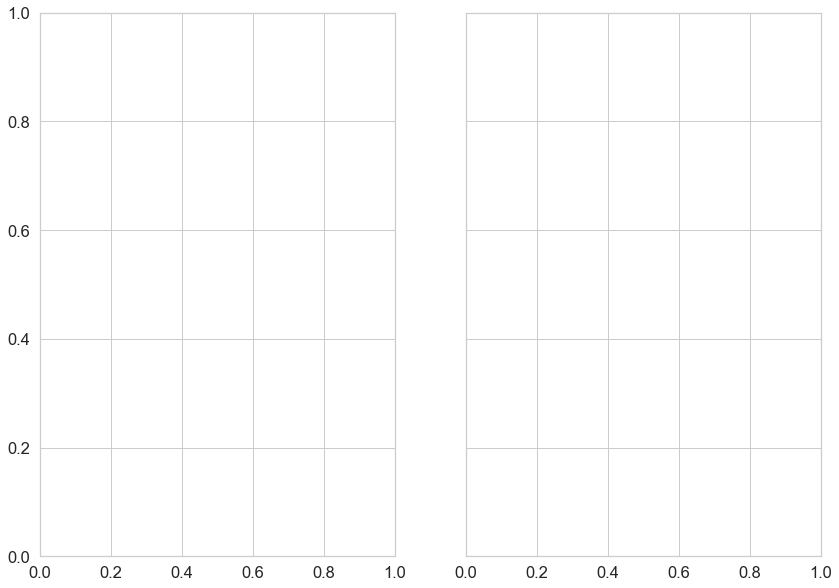

In [3]:
#| label: fig-main
#| include: true
#| echo: false
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(14,10))
cph = CoxPHFitter(penalizer=0.0, l1_ratio=1)
cph.fit(rossi, 'week', 'arrest')
_ = cph.plot(ax=axes[0])

cph = CoxPHFitter(penalizer=0.02, l1_ratio=1)
cph.fit(rossi, 'week', 'arrest')
_ = cph.plot(ax=axes[1])
plt.show()